In [2]:
import numpy as np
from scipy.special import betaincinv
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def Phi(p, pm, n):
    lp = betaincinv(n/2, 1/2, 2*p)
    lpm = betaincinv(1/2, n/2, 1-2*pm)
    return (
        (lp**((0.5)*(-n-1))) *
        np.sqrt((-lp*(lpm-1))/((lp-1)*lpm - 2*np.sqrt((1-lp)*lp)*np.sqrt((1-lpm)*lpm) + 1)) *
        (1/((1/lp) - (2*np.sqrt(1-lp)*np.sqrt(lpm)/(np.sqrt(lp)*np.sqrt(1-lpm))) + (1/(1-lpm)) - 1))**(n/2)
    )

median_p = 0.02
n_reps = 30

def Phi_fixed(p):
    return Phi(p, median_p, n_reps)

def Phi_integral(x):
    if x == 0:
        return 0
    return quad(Phi_fixed, 0, x)[0]

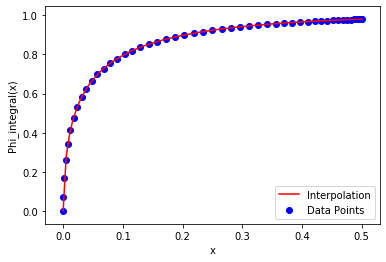

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values to interpolate over
x_range = (0, 0.5)

# Define the number of data points to use
n_points = 51

# Generate the data points to interpolate
x_points = np.cos(np.pi * (np.arange(n_points) / (n_points - 1)))
x_points_rescaled = (x_points + 1) / 2 * (x_range[1] - x_range[0]) + x_range[0]
y_points = np.array([Phi_integral(x) for x in x_points_rescaled])

# Compute the Chebyshev interpolating polynomial using the original x_points
cheb_coeffs = np.polynomial.chebyshev.chebfit(x_points, y_points, n_points - 1)

# Define a sequence of x values to evaluate the interpolating polynomial at
x_seq = np.linspace(x_range[0], x_range[1], 100)

# Rescale x_seq to match the original x_points scale
x_seq_rescaled = (2 * (x_seq - x_range[0]) / (x_range[1] - x_range[0])) - 1

# Evaluate the interpolating polynomial at the sequence of rescaled x values
y_seq = np.polynomial.chebyshev.chebval(x_seq_rescaled, cheb_coeffs)

# Plot the original function and the interpolation
plt.plot(x_seq, y_seq, label='Interpolation', color='red')
plt.scatter(x_points_rescaled, y_points, label='Data Points', color='blue')
plt.xlabel('x')
plt.ylabel('Phi_integral(x)')
plt.legend()
plt.show()

In [5]:
# Input the x value
x_value = 0

# Rescale x_value to match the original x_points scale
x_value_rescaled = (2 * (x_value - x_range[0]) / (x_range[1] - x_range[0])) - 1

# Evaluate the interpolating polynomial at the rescaled x value
y_value = np.polynomial.chebyshev.chebval(x_value_rescaled, cheb_coeffs)

print(f"The interpolant value at x = {x_value} is {y_value}")

The interpolant value at x = 0 is -2.6645352591003757e-15


Interpolant values at Chebyshev nodes:
[ 9.80000000e-01  9.79946110e-01  9.79783877e-01  9.79511606e-01
  9.79126448e-01  9.78624375e-01  9.78000134e-01  9.77247189e-01
  9.76357651e-01  9.75322191e-01  9.74129938e-01  9.72768358e-01
  9.71223109e-01  9.69477887e-01  9.67514229e-01  9.65311306e-01
  9.62845674e-01  9.60090994e-01  9.57017715e-01  9.53592705e-01
  9.49778838e-01  9.45534516e-01  9.40813122e-01  9.35562396e-01
  9.29723715e-01  9.23231263e-01  9.16011077e-01  9.07979933e-01
  8.99044060e-01  8.89097634e-01  8.78021015e-01  8.65678682e-01
  8.51916785e-01  8.36560255e-01  8.19409357e-01  8.00235582e-01
  7.78776706e-01  7.54730870e-01  7.27749430e-01  6.97428380e-01
  6.63298090e-01  6.24811255e-01  5.81329273e-01  5.32108234e-01
  4.76288315e-01  4.12897542e-01  3.40901871e-01  2.59402061e-01
  1.68344369e-01  7.15187208e-02 -2.66453526e-15]

Original function values at Chebyshev nodes:
[0.98       0.97994611 0.97978388 0.97951161 0.97912645 0.97862438
 0.97800013 0.9772

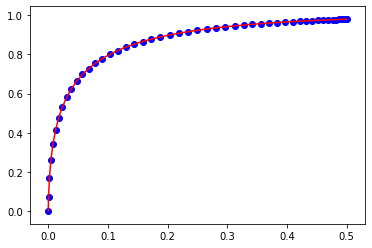

In [6]:
# Compute the Chebyshev interpolating polynomial using the original x_points
cheb_coeffs = np.polynomial.chebyshev.chebfit(x_points, y_points, n_points - 1)

# Now the interpolant should match the function values exactly at the Chebyshev nodes
y_interpolated_cheb_nodes = np.polynomial.chebyshev.chebval(x_points, cheb_coeffs)

# Verify that the interpolant matches the original function values at the Chebyshev nodes
print("Interpolant values at Chebyshev nodes:")
print(y_interpolated_cheb_nodes)
print("\nOriginal function values at Chebyshev nodes:")
print(y_points)
print("\nDifference between interpolant and original function values:")
print(y_interpolated_cheb_nodes - y_points)

plt.plot(x_points_rescaled, y_interpolated_cheb_nodes, label='Interpolation', color='red')
plt.scatter(x_points_rescaled, y_points, label='Data Points', color='blue')

In [7]:
# Define a function to evaluate the interpolated polynomial at a given x value


def eval_interpolant(x):
    # Rescale x to match the original x_points scale
    x_rescaled = (2 * (x - x_range[0]) / (x_range[1] - x_range[0])) - 1
    
    # Evaluate the interpolating polynomial at the rescaled x value
    y = np.polynomial.chebyshev.chebval(x_rescaled, cheb_coeffs)
    
    return y

In [8]:
eval_interpolant(0)

-2.6645352591003757e-15

In [9]:
from scipy import integrate

def integrand(p, m, cheb_coeffs):
    interpolant_value = np.polynomial.chebyshev.chebval(p, cheb_coeffs)
    return(-m * Phi_fixed(p) * (interpolant_value**(m-1)))

def integrate_with_interpolant(m, cheb_coeffs):
    return integrate.quad(integrand, 0, 0.2, args=(m, cheb_coeffs))[0]

In [10]:
integrate_with_interpolant(1, cheb_coeffs)

-0.8970938756290595

In [11]:
def integrand(p, cheb_coeffs):
    interpolant_value = np.polynomial.chebyshev.chebval(p, cheb_coeffs)
    return interpolant_value

integrand(0.5, cheb_coeffs)

0.9611555973479167

In [12]:
np.polynomial.chebyshev.chebval(0.5, cheb_coeffs)

0.9611555973479167

In [13]:
m = 40
p = 0.25
print(-m * Phi_fixed(p) * np.polynomial.chebyshev.chebval(p, cheb_coeffs)**(m-1))

-1.970407066359814


In [14]:


def Phi(p, pm, n):
    lp = betaincinv(n/2, 1/2, 2*p)
    lpm = betaincinv(1/2, n/2, 1-2*pm)
    return (
        (lp**((0.5)*(-n-1))) *
        np.sqrt((-lp*(lpm-1))/((lp-1)*lpm - 2*np.sqrt((1-lp)*lp)*np.sqrt((1-lpm)*lpm) + 1)) *
        (1/((1/lp) - (2*np.sqrt(1-lp)*np.sqrt(lpm)/(np.sqrt(lp)*np.sqrt(1-lpm))) + (1/(1-lpm)) - 1))**(n/2)
    )

def Phi_H(p, pm, n):
    lp = betaincinv(n/2, 1/2, 2*p)
    lpm = betaincinv(1/2, n/2, 1-2*pm)
    lp_prime = betaincinv(1/2, n/2, 2*p-1)
    numerator = (lp_prime - 1) * (lpm - 1)
    denominator = (lp_prime * (-lpm)) + 2 * np.sqrt((1 - lp_prime) * lp_prime) * np.sqrt((1 - lpm) * lpm) + 1
    return ((1 - lp_prime)**((-n-1)/2)) * np.power(numerator / denominator, (n+1)/2)

def phi(p, pm, n):
    if p <= 0.5:
        return Phi(p, pm, n)
    else:
        return Phi_H(p, pm, n)



/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]
/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


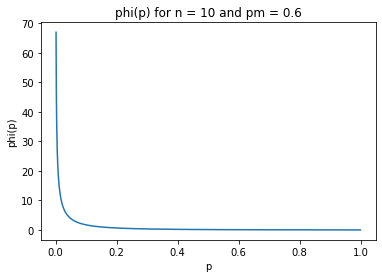

In [15]:
from scipy.special import betaincinv
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate


def phi(p, pm, n):
    if p < 0.5:
        lp = betaincinv(n/2, 1/2, 2*p)
        lpm = betaincinv(1/2, n/2, 1-2*pm)
        return (
            (lp**((0.5)*(-n-1))) *
            np.sqrt((-lp*(lpm-1))/((lp-1)*lpm - 2*np.sqrt((1-lp)*lp)*np.sqrt((1-lpm)*lpm) + 1)) *
            (1/((1/lp) - (2*np.sqrt(1-lp)*np.sqrt(lpm)/(np.sqrt(lp)*np.sqrt(1-lpm))) + (1/(1-lpm)) - 1))**(n/2)
        )
    else:
        lp = betaincinv(n/2, 1/2, 2*p)
        lpm = betaincinv(1/2, n/2, 1-2*pm)
        lp_prime = betaincinv(1/2, n/2, 2*p-1)
        numerator = (lp_prime - 1) * (lpm - 1)
        denominator = (lp_prime * (-lpm)) + 2 * np.sqrt((1 - lp_prime) * lp_prime) * np.sqrt((1 - lpm) * lpm) + 1
        return ((1 - lp_prime)**((-n-1)/2)) * np.power(numerator / denominator, (n+1)/2)

# Set the parameters
n = 30 # sample size
median_p = 0.02137005

# Define the range of p values to plot
p_values = np.linspace(0, 1, 1000)

# Compute the function values for the given range of p values
phi_values = [phi(p, median_p, n) for p in p_values]

# Plot the function
plt.plot(p_values, phi_values)
plt.xlabel('p')
plt.ylabel('phi(p)')
plt.title('phi(p) for n = 10 and pm = 0.6')
plt.show()

In [16]:
def phi_fixed(p):
    return phi(p, median_p, n)

def phi_integral(x):
    if x == 0:
        return 0
    return quad(phi_fixed, 0, x)[0]

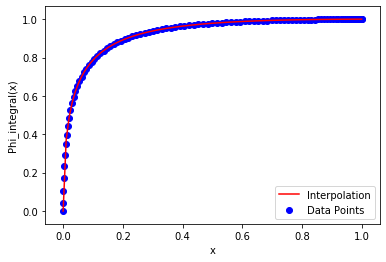

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values to interpolate over
x_range = (0, 1)

# Define the number of data points to use
n_points = 101

# Generate the data points to interpolate
x_points = np.cos(np.pi * (np.arange(n_points) / (n_points - 1)))
x_points_rescaled = (x_points + 1) / 2 * (x_range[1] - x_range[0]) + x_range[0]
y_points = np.array([phi_integral(x) for x in x_points_rescaled])

# Compute the Chebyshev interpolating polynomial using the original x_points
cheb_coeffs = np.polynomial.chebyshev.chebfit(x_points, y_points, n_points - 1)

# Define a sequence of x values to evaluate the interpolating polynomial at
x_seq = np.linspace(x_range[0], x_range[1], 100)

# Rescale x_seq to match the original x_points scale
x_seq_rescaled = (2 * (x_seq - x_range[0]) / (x_range[1] - x_range[0])) - 1

# Evaluate the interpolating polynomial at the sequence of rescaled x values
y_seq = np.polynomial.chebyshev.chebval(x_seq_rescaled, cheb_coeffs)

# Plot the original function and the interpolation
plt.plot(x_seq, y_seq, label='Interpolation', color='red')
plt.scatter(x_points_rescaled, y_points, label='Data Points', color='blue')
plt.xlabel('x')
plt.ylabel('Phi_integral(x)')
plt.legend()
plt.show()

In [18]:
def evaluate_chebychev_interpolant(p, cheb_coeffs, x_range):
    # Rescale p to match the original x_points scale
    p_rescaled = (2 * (p - x_range[0]) / (x_range[1] - x_range[0])) - 1
    # Evaluate the interpolating polynomial at the rescaled p value
    y = np.polynomial.chebyshev.chebval(p_rescaled, cheb_coeffs)
    return y

# Evaluate the interpolating polynomial at a given p value
p = 1
y_interp = evaluate_chebychev_interpolant(p, cheb_coeffs, x_range)
print(f"The interpolant value at p = {p} is {y_interp}")

The interpolant value at p = 1 is 0.9999999969265941


In [19]:
from scipy import integrate

def integrand(p, m, cheb_coeffs):
    interpolant_value = np.polynomial.chebyshev.chebval(p, cheb_coeffs)
    return(-m * phi_fixed(p) * (interpolant_value**(m-1)))

def integrate_with_interpolant(m, cheb_coeffs):
    return integrate.quad(integrand, 0, 1, args=(m, cheb_coeffs))[0]

## Code for Figure 2.3

In [21]:
import numpy as np
from scipy.integrate import quad
from scipy.misc import derivative


# Function to calculate the CDF of the custom PDF
def cdf_phi(p, pm, n):
    return quad(phi, 0, p, args=(pm, n))[0]

# Function to calculate the CDF of the minimum of m trials
def cdf_min_m(p, pm, n, m):
    cdf = cdf_phi(p, pm, n)
    return 1 - (1 - cdf) ** m

# Function to calculate the PDF of the minimum of m trials
def pdf_min_m(p, pm, n, m):
    return derivative(lambda x: cdf_min_m(x, pm, n, m), p, dx=1e-6)

# Function to compute the expectation of the minimum of m trials
def expectation_min_m(pm, n, m):
    integrand = lambda p: p * pdf_min_m(p, pm, n, m)
    return quad(integrand, 0, 1, limit=200)[0]

# Example usage
pm = 0.1 # Example parameter
n = 30    # Example parameter
m = 2    # Number of trials

expectation = expectation_min_m(pm, n, m)
print("Expectation of the minimum of m trials:", expectation)

Expectation of the minimum of m trials: 0.07704647345683609


/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.


In [44]:
# Example usage
pm = 0.45 # Example parameter
n = 30    # Example parameter

# Calculate expectations for m=1 to m=20
m_values = np.arange(1, 15)
expectations5 = [expectation_min_m(pm, n, m) for m in m_values]

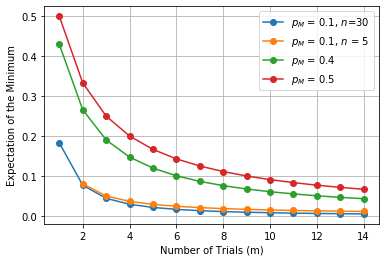

In [58]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(m_values, expectations1, marker='o', label=r'$p_M$ = 0.1, $n$=30')
plt.plot(m_values, expectations2, marker='o', label=r'$p_M$ = 0.1, $n$ = 5')
plt.plot(m_values, expectations3, marker='o', label=r'$p_M$ = 0.4')
plt.plot(m_values, expectations4, marker='o', label=r'$p_M$ = 0.5')


# Add labels and title
plt.xlabel('Number of Trials (m)')
plt.ylabel('Expectation of the Minimum')
# plt.title('Expectation of the Minimum vs. Number of Trials')  # Commented out

# Add legend
plt.legend(loc='upper right')

# Add grid and show plot
plt.grid()

plt.savefig('trials.png', dpi=300)
plt.show()